## Multi-variable Linear Regression

In [2]:
# import libraries

import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


### Multi-variable linear regression
Predicting exam score - regression using three inputs (x1, x2, x3)

|x1 (quiz 1)|x2 (quiz 2)|x3 (mid 1)|Y (final)
|---|---|---|---|
|73|80|75|152|
|93|88|93|185|
|89|91|90|180|
|96|98|100|196|
|73|66|70|142|
Test Scores for General Psychology ( https://goo.gl/g2T8Kp )

### Matrix multiplication
#### dot product(=scalar product, 내적)
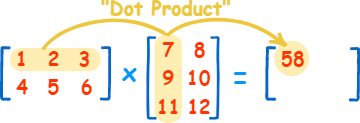

#### Hypothesis
$$ H(x) = w x + b $$$$ H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$


### Hypothesis using matrix
#### Many x instances
$$ \begin{pmatrix} x_{ 11 }  x_{ 12 }  x_{ 13 } \\ x_{ 21 } x_{ 22 }  x_{ 23 } \\ x_{ 31 }  x_{ 32 }  x_{ 33 }\\ x_{ 41 }  x_{ 42 }  x_{ 43 }\\ x_{ 51 }  x_{ 52 }  x_{ 53 }\end{pmatrix} \cdot \begin{pmatrix} w_{ 1 } \\ w_{ 2 } \\ w_{ 3 } \end{pmatrix}=\begin{pmatrix} x_{ 11 }w_{ 1 }+x_{ 12 }w_{ 2 }+x_{ 13 }w_{ 3 } \\ x_{ 21 }w_{ 1 }+x_{ 22 }w_{ 2 }+x_{ 23 }w_{ 3 }\\ x_{ 31 }w_{ 1 }+x_{ 32 }w_{ 2 }+x_{ 33 }w_{ 3 } \\ x_{ 41 }w_{ 1 }+x_{ 42 }w_{ 2 }+x_{ 43 }w_{ 3 } \\ x_{ 51 }w_{ 1 }+x_{ 52 }w_{ 2 }+x_{ 53 }w_{ 3 } \end{pmatrix} $$$$ [5, 3] \cdot [3, 1] = [5, 1] $$$$ H(X) = XW $$

5는 데이터(instance)의 수, 3은 변수(feature)의 수, 1은 결과


### WX vs XW
#### Theory (Lecture) :
$$ H(x) = Wx + b  $$

#### TensorFlow (Implementation) :
$$ H(X) = XW $$

### Simple Example (2 variables)

In [3]:
tf.random.set_seed(0)  # for reproducibility

In [4]:
# 데이터 생성
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

# 가중치 랜덤 배정
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b  = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

# 학습률 지정
learning_rate = tf.Variable(0.001)

# GradientTape을 이용해서 W가 최소가 되게하는 값을 찾음
for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b # Hypothesis 수식
        cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # Cost 수식
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b]) # Cost를 W1, W2, b에 관해 미분한 값 저장 
    
    # 지정한 학습률을 곱하여 배정
    W1.assign_sub(learning_rate * W1_grad) 
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # 50번마다 한 번씩 결과값 출력
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 335.280823 |    -4.0663 |     1.1220 |  -6.065215
   50 |  76.037262 |    -0.8001 |     1.6209 |  -4.978779
  100 |  18.959263 |     0.7151 |     1.8781 |  -4.429109
  150 |   6.310240 |     1.4125 |     2.0104 |  -4.134423
  200 |   3.445082 |     1.7284 |     2.0768 |  -3.961648
  250 |   2.743659 |     1.8667 |     2.1075 |  -3.847750
  300 |   2.525401 |     1.9225 |     2.1184 |  -3.762738
  350 |   2.417754 |     1.9402 |     2.1181 |  -3.692262
  400 |   2.337300 |     1.9403 |     2.1114 |  -3.629400
  450 |   2.264998 |     1.9325 |     2.1008 |  -3.570778
  500 |   2.196328 |     1.9213 |     2.0881 |  -3.514729
  550 |   2.130126 |     1.9085 |     2.0741 |  -3.460409
  600 |   2.066037 |     1.8953 |     2.0595 |  -3.407385
  650 |   2.003917 |     1.8819 |     2.0444 |  -3.355424
  700 |   1.943679 |     1.8686 |     2.0293 |  -3.304398
  750 |   1.885258 |     1.8555 |     2.0141 |  -3.254230
  800 |   1.828595 |     1.8425 |     1.9990 |  -3.204873
  850 |   1.77

### Simple Example (2 variables with Matrix)

In [5]:
# 데이터를 Matrix 형태로 생성
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

# 가중치는 1*2의 Matrix 형태를 가짐
# random weight
W = tf.Variable(tf.random.uniform((1, 2), -1.0, 1.0))
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))

# 학습률 지정
learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b # (1, 2) * (2, 5) = (1, 5)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

    0 |  36.403778 |    -0.6231 |    -0.3508 |  -0.961774
   50 |   9.372901 |     0.2914 |     0.1682 |  -0.557764
  100 |   2.639858 |     0.7060 |     0.4867 |  -0.347756
  150 |   0.825069 |     0.8912 |     0.6846 |  -0.235665
  200 |   0.284990 |     0.9721 |     0.8088 |  -0.174012
  250 |   0.106844 |     1.0062 |     0.8873 |  -0.138953
  300 |   0.042677 |     1.0195 |     0.9372 |  -0.118279
  350 |   0.018044 |     1.0241 |     0.9690 |  -0.105598
  400 |   0.008188 |     1.0250 |     0.9893 |  -0.097477
  450 |   0.004138 |     1.0246 |     1.0022 |  -0.092026
  500 |   0.002439 |     1.0239 |     1.0104 |  -0.088173
  550 |   0.001710 |     1.0230 |     1.0156 |  -0.085299
  600 |   0.001384 |     1.0223 |     1.0188 |  -0.083036
  650 |   0.001227 |     1.0217 |     1.0207 |  -0.081161
  700 |   0.001142 |     1.0212 |     1.0218 |  -0.079538
  750 |   0.001088 |     1.0207 |     1.0224 |  -0.078080
  800 |   0.001046 |     1.0203 |     1.0227 |  -0.076735
  850 |   0.00

### Hypothesis without b

In [6]:
import tensorflow as tf

# 앞의 코드에서 bias(b)를 행렬에 추가
x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 3), -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

# 학습률 지정
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) # b가 없다
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  16.019751 |    -0.1985 |     0.3424 |    -0.6835
   50 |   5.635924 |     0.0582 |     0.6809 |    -0.1215
  100 |   2.141112 |     0.1997 |     0.8238 |     0.2356
  150 |   0.862825 |     0.2786 |     0.8808 |     0.4641
  200 |   0.367090 |     0.3227 |     0.9015 |     0.6112
  250 |   0.167513 |     0.3468 |     0.9074 |     0.7064
  300 |   0.085210 |     0.3593 |     0.9082 |     0.7684
  350 |   0.050615 |     0.3649 |     0.9074 |     0.8090
  400 |   0.035731 |     0.3663 |     0.9067 |     0.8359
  450 |   0.029064 |     0.3651 |     0.9063 |     0.8539
  500 |   0.025846 |     0.3624 |     0.9064 |     0.8661
  550 |   0.024085 |     0.3587 |     0.9069 |     0.8746
  600 |   0.022948 |     0.3544 |     0.9076 |     0.8807
  650 |   0.022085 |     0.3497 |     0.9086 |     0.8852
  700 |   0.021348 |     0.3449 |     0.9097 |     0.8887
  750 |   0.020676 |     0.3400 |     0.9109 |     0.8916
  800 |   0.020042 |     0.3350 |     0.9121 |     0.8940
  850 |   0.01

b를 X Matrix에 포함시켜서 가중치가 2->3(w1, w2, w3)개로 늘어났음

### Custom Gradient
- tf.train.GradientDescentOptimizer(): optimizer
- optimizer.apply_gradients(): update

In [7]:
# Multi-variable linear regression (1)

# tf.constant : 텐서플로우 변하지 않는 상수 생성
X = tf.constant([[1., 2.], 
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

# Random weight
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 반복횟수 지정
n_epoch = 1000+1
print("epoch | cost")

for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b # Hypothesis 
        cost = tf.reduce_mean(tf.square(y_pred - y)) # Cost

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])
    
    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:10.6f}".format(i, cost.numpy()))

epoch | cost
    0 |  21.726822
   50 |   0.258689
  100 |   0.176868
  150 |   0.120926
  200 |   0.082678
  250 |   0.056528
  300 |   0.038649
  350 |   0.026424
  400 |   0.018067
  450 |   0.012352
  500 |   0.008445
  550 |   0.005774
  600 |   0.003948
  650 |   0.002699
  700 |   0.001845
  750 |   0.001262
  800 |   0.000863
  850 |   0.000590
  900 |   0.000403
  950 |   0.000276
 1000 |   0.000189


### Predicting exam score
regression using three inputs (x1, x2, x3)

In [8]:
tf.random.set_seed(0)  # for reproducibility(재현성)

In [10]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# weights random 지정
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b  = tf.Variable(10.)

# 학습률 지정
learning_rate = 0.000001

for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 | 5793889.5000
   50 |   64291.1562
  100 |     715.2903
  150 |       9.8461
  200 |       2.0152
  250 |       1.9252
  300 |       1.9210
  350 |       1.9177
  400 |       1.9145
  450 |       1.9114
  500 |       1.9081
  550 |       1.9050
  600 |       1.9018
  650 |       1.8986
  700 |       1.8955
  750 |       1.8923
  800 |       1.8892
  850 |       1.8861
  900 |       1.8829
  950 |       1.8798
 1000 |       1.8767


### Multi-variable linear regression (1)
- random 초기화: tf.random_normal()

In [11]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# random weights
w1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b  = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   11325.9121
   50 |     135.3618
  100 |      11.1817
  150 |       9.7940
  200 |       9.7687
  250 |       9.7587
  300 |       9.7489
  350 |       9.7389
  400 |       9.7292
  450 |       9.7194
  500 |       9.7096
  550 |       9.6999
  600 |       9.6903
  650 |       9.6806
  700 |       9.6709
  750 |       9.6612
  800 |       9.6517
  850 |       9.6421
  900 |       9.6325
  950 |       9.6229
 1000 |       9.6134


### Multi-variable linear regression (2)
- Matrix 사용

In [13]:
# Data Matirx 형태로 지정
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]  # [모두, 처음부터 마지막 1열 빼고]
y = data[:, [-1]] # [모두, 마지막 1열]

# weight random 배정
W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

# 반복횟수 지정
n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 |  9563.7852
  100 |     4.5003
  200 |     3.3124
  300 |     3.3014
  400 |     3.2907
  500 |     3.2800
  600 |     3.2693
  700 |     3.2587
  800 |     3.2482
  900 |     3.2378
 1000 |     3.2274
 1100 |     3.2170
 1200 |     3.2067
 1300 |     3.1963
 1400 |     3.1861
 1500 |     3.1760
 1600 |     3.1659
 1700 |     3.1559
 1800 |     3.1458
 1900 |     3.1359
 2000 |     3.1260


In [15]:
# W1, W2, W3값 출력
W.numpy()

array([[ 1.8544998 ],
       [ 0.5379935 ],
       [-0.36304417]], dtype=float32)

In [16]:
# b값 출력
b.numpy()

array([-0.57518363], dtype=float32)

In [17]:
# Hypothesis 값 출력
tf.matmul(X, W) + b

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[150.61446],
       [185.47362],
       [180.75873],
       [193.87575],
       [144.89778]], dtype=float32)>

### predict

In [18]:
Y # labels, 실제값

[152.0, 185.0, 180.0, 196.0, 142.0]

In [19]:
predict(X).numpy() # prediction, 예측값

array([[150.61446],
       [185.47362],
       [180.75873],
       [193.87575],
       [144.89778]], dtype=float32)

In [20]:
# 새로운 데이터에 대한 예측

predict([[ 89.,  95.,  92.],[ 84.,  92.,  85.]]).numpy()

array([[182.18462],
       [173.83945]], dtype=float32)